In [61]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [20]:
Data = pd.read_excel("Airlines+Data.xlsx")
Data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# EDA and data visualization

In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        96 non-null     datetime64[ns]
 1   passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [22]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [23]:
Data.columns = ["date","passengers"]
Data.head()

,date,passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


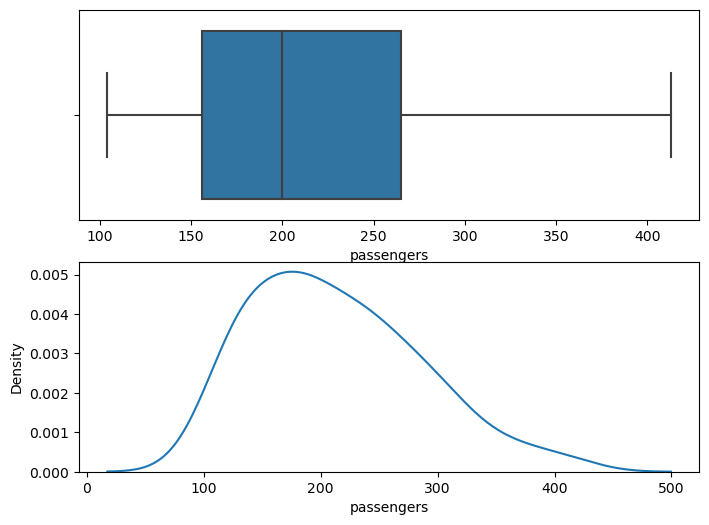

In [24]:
plt.figure(figsize = (8,6))
plt.subplot(211)
sns.boxplot(Data.passengers)
plt.subplot(212)
sns.kdeplot(Data.passengers)
plt.show()

In [25]:
Data["month"] = Data.date.dt.strftime("%b") # month extraction
Data["year"] = Data.date.dt.strftime("%Y") # year extraction
Data.head()

,date,passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [50]:
heatmap_y_month = pd.pivot_table(data=Data,values="passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


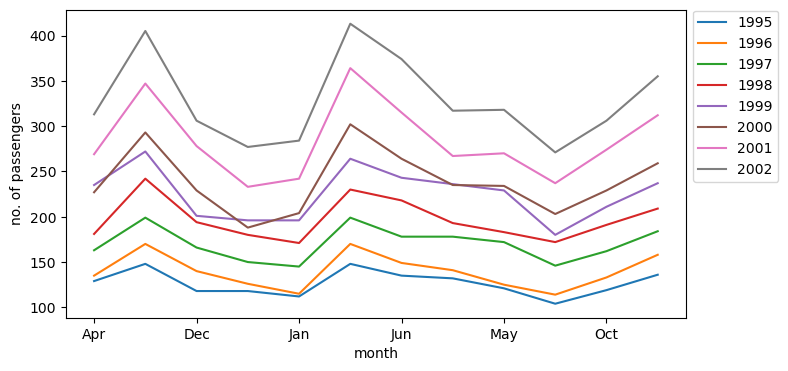

In [87]:
heatmap_y_month.T.plot(figsize=(8,4))
plt.ylabel("no. of passengers")
plt.legend(bbox_to_anchor =(1, 1.02))
plt.show()

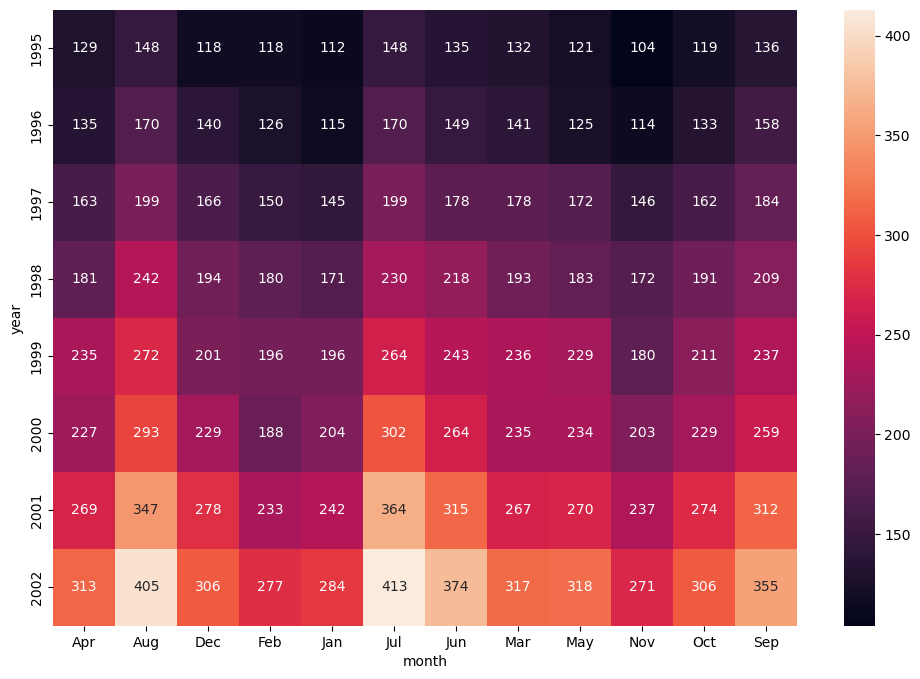

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,annot=True,fmt="g"); #fmt is format of the grid values

higher number of passangers were recorded in the month of July and august irrispective of the year.

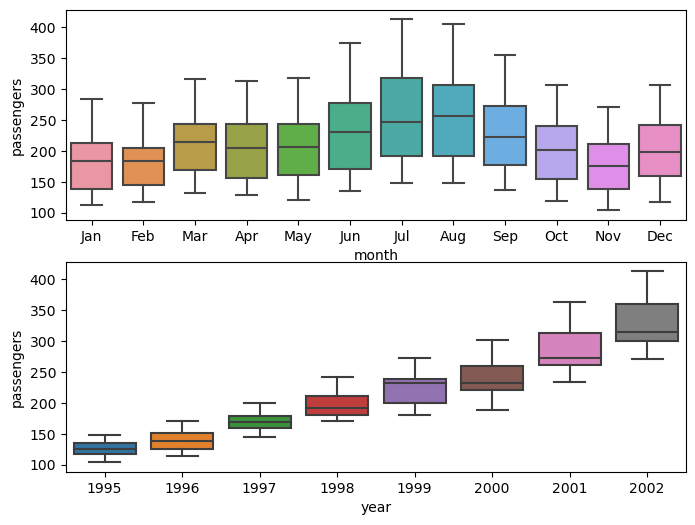

In [28]:
# Boxplots
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="passengers",data=Data)
plt.subplot(212)
sns.boxplot(x="year",y="passengers",data=Data)
plt.show()

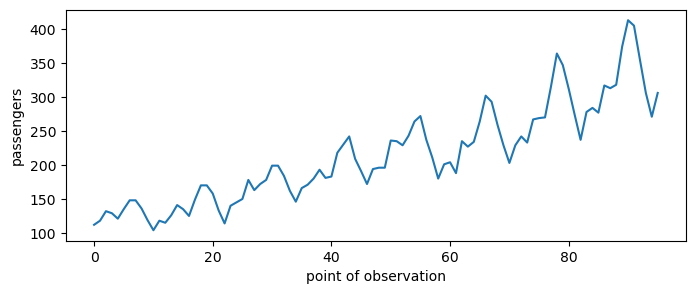

In [51]:
Data['passengers'].plot(figsize=(8, 3))
plt.xlabel("point of observation")
plt.ylabel("passengers")
plt.show()

Data shows a linear trend and seasonality over time. since the variance is increasing over time, the seasonality seems to be multiplicative. 

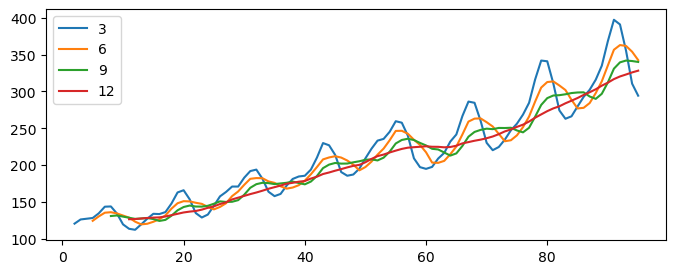

In [91]:
plt.figure(figsize=(8,3))
for i in range(3,13,3):
     Data["passengers"].rolling(i).mean().plot(label=str(i))

plt.legend(loc=2)
plt.show()

**12 month's rolling average smoothens out the variability (seasonality) and makes the series stationary**

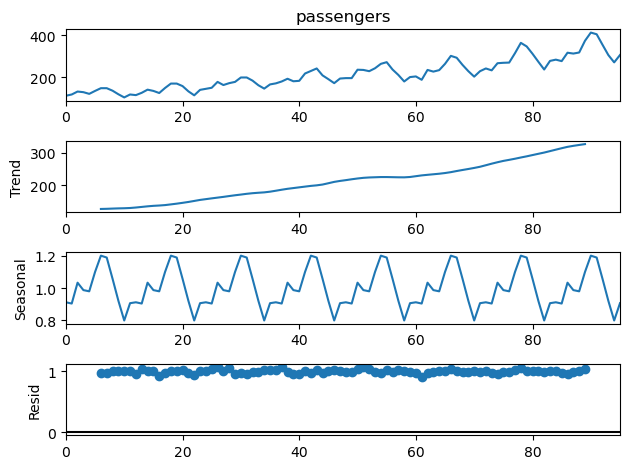

In [92]:
ts_mul = seasonal_decompose(Data.passengers,model="multiplicative", period =12)
fig = ts_mul.plot()
plt.show()

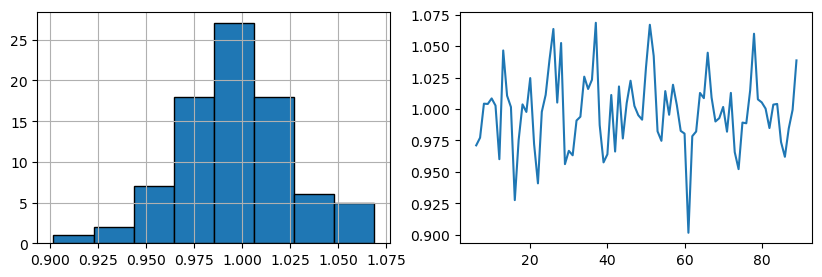

In [97]:
# residual distributions for the additive and multiplicatve
residual_mul = ts_mul.resid
plt.figure(figsize=(10,3))
plt.subplot(121)
residual_mul.hist(bins = 8, edgecolor = 'black')
plt.subplot(122)
residual_mul.plot()
plt.show()

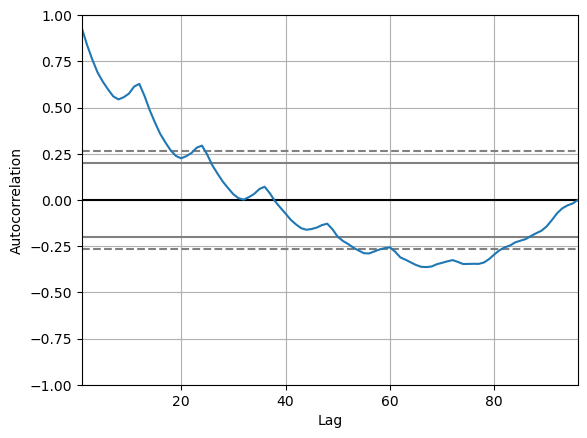

In [103]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Data.passengers)
plt.show()

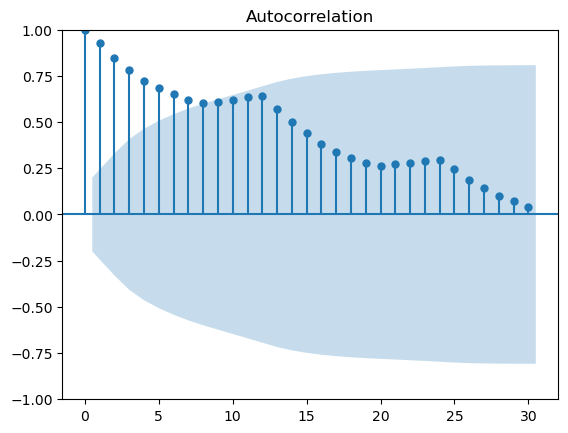

In [104]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Data.log_passengers,lags=30)
plt.show()

**significant positive correlation for first 12 lag**

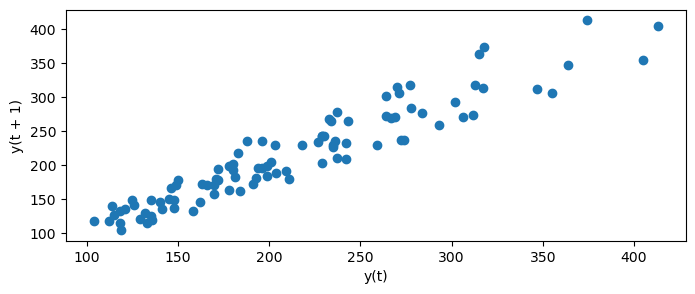

In [105]:
plt.figure(figsize = (8,3))
lag_plot(Data.passengers)
plt.show()

**A lag plot checks whether a data set or time series is random or not. Random data should not exhibit any identifiable structure in the lag plot. Non-random structure in the lag plot indicates that the underlying data are not random.**

# Preparing Dataset for modelling

In [53]:
from numpy import log
Data["log_passengers"] = log(Data["passengers"])

In [113]:
Data['t'] = range(1,(len(Data["passengers"])+1))
Data['t_sq'] = Data['t']**2
Data.shape

(96, 7)

In [115]:
Data_dummy = pd.get_dummies(Data)
Data_dummy.head()

,date,passengers,log_passengers,t,t_sq,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,...,month_Oct,month_Sep,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002
0,1995-01-01,112,4.718499,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,2,4,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,3,9,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1995-04-01,129,4.859812,4,16,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,5,25,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [125]:
df = Data_dummy.drop(["year_1995","year_1996","year_1997","year_1998","year_1999","year_2000","year_2001","year_2002"], axis =1)
df.rename(
    columns={"month_Jan": "Jan", "month_Feb": "Feb", "month_Mar": "Mar","month_Apr": "Apr","month_May": "May","month_Jun": "Jun",
            "month_Jul": "Jul","month_Aug": "Aug","month_Sep": "Sep","month_Oct": "Oct","month_Nov": "Nov","month_Dec": "Dec",},
    inplace=True,
)
df["year"] = Data["year"]
print(df.shape)
df.head()

(96, 18)


,date,passengers,log_passengers,t,t_sq,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year
0,1995-01-01,112,4.718499,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,4.770685,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,4.882802,3,9,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,4.859812,4,16,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,4.795791,5,25,0,0,0,0,0,0,0,0,1,0,0,0,1995


In [126]:
#splitting the data
train, test = np.split(df, [int(.67 *len(df))])
print("train dimensions", train.shape)
print("test dimensions", test.shape)

train dimensions (64, 18)
test dimensions (32, 18)


# Model building

**model based forcasting**

In [127]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(test[["t"]]))
rmse_linear = np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_linear))**2))
rmse_linear

49.6853235132085

In [128]:
#Quadratic 

Quad = smf.ols('passengers~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.189555144151804

In [129]:
#Exponential

Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(test[["t","t_sq"]]))
rmse_Exp = np.sqrt(np.mean((np.array(test['passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

40.84924171132655

In [130]:
#Additive seasonality 
add_sea = smf.ols('passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar', 'Apr','May','Jun',
                                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

123.94935401651409

In [131]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar', 'Apr','May','Jun','Jul',
                                                         'Aug', 'Sep', 'Oct', 'Nov', 'Dec','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

34.503504038585966

In [132]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

127.83693479585895

In [133]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Jan','Feb','Mar', 'Apr','May','Jun','Jul',
                                                         'Aug', 'Sep', 'Oct', 'Nov', 'Dec','t','t_sq']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad


291.3355704156114

In [134]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

12.759135120295241

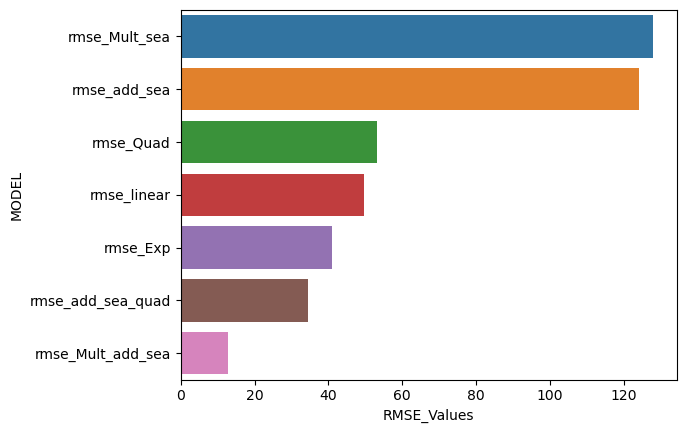

In [135]:
results1 = {"MODEL":["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"],
           "RMSE_Values":[rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea]}
table_rmse1=pd.DataFrame(data=results1)
sns.barplot(data=table_rmse1.sort_values(['RMSE_Values'],ascending=False), x="RMSE_Values", y="MODEL")
plt.show()

# Data Driven Models for forcasting

In [138]:
#neccessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [139]:
# evaluation matrix, root mean square error
def rmse(org,pred):
    temp = np.sqrt(np.abs((org-pred)**2))
    return np.mean(temp)

In [140]:
#Simple exponential method
ses_model = SimpleExpSmoothing(train["passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse1 = rmse(pred_ses,test.passengers) 
rmse1

76.3537432011959

In [141]:
# Holt method 
hw_model = Holt(train["passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse2 = rmse(pred_hw,test.passengers) 
rmse2

33.954968887272294

In [142]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse3 = rmse(pred_hwe_add_add,test.passengers) 
rmse3

42.18129139803494

In [143]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse4 = rmse(pred_hwe_mul_add,test.passengers)
rmse4

42.45947229956113

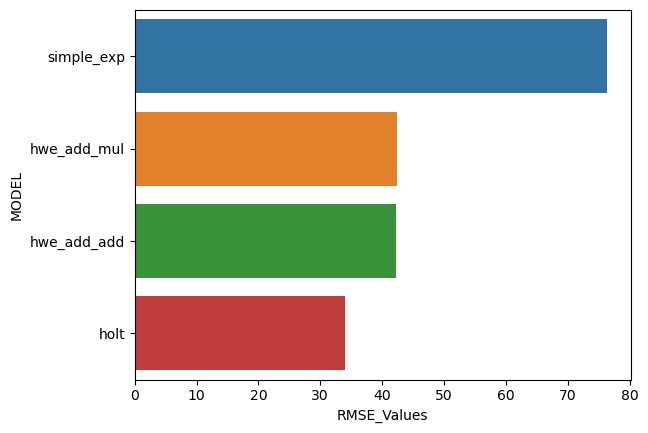

In [145]:
results2 = {"MODEL":["simple_exp","holt","hwe_add_add","hwe_add_mul"],
           "RMSE_Values":[rmse1,rmse2,rmse3,rmse4]}
table_rmse2=pd.DataFrame(data=results2)
sns.barplot(data=table_rmse2.sort_values(['RMSE_Values'],ascending=False), x="RMSE_Values", y="MODEL")
plt.show()

# ARIMA model

In [146]:
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [185]:
#splitting the data
X = df['passengers'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
print(train.size)
print(test.size)

67
29


In [186]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    history = [x for x in train1]
    predictions = []
    for t in range(len(test1)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()      
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test1[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test1, predictions))
    return rmse

In [187]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train1, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [190]:
# evaluate parameters
p_values = range(8, 13)
d_values = range(3, 6)
q_values = range(2, 5)
evaluate_models(train1, p_values, d_values, q_values)

ARIMA(8, 3, 3) RMSE=29.820
ARIMA(8, 3, 4) RMSE=28.873
ARIMA(9, 3, 3) RMSE=27.970
ARIMA(9, 3, 4) RMSE=26.033
ARIMA(10, 3, 3) RMSE=13.605
ARIMA(11, 3, 2) RMSE=10.023
Best ARIMA(11, 3, 2) RMSE=10.023


In [191]:
#final ARIMA (rolling forcast ARIMA model)
history = [x for x in train]
predictions = []
res = []
for t in range(len(test)):
    model = ARIMA(history, order=(11,3,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    res.append(model_fit.resid)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=308.441206, expected=293.000000
predicted=265.815300, expected=259.000000
predicted=238.260615, expected=229.000000
predicted=200.298766, expected=203.000000
predicted=223.714209, expected=229.000000
predicted=226.363940, expected=242.000000
predicted=227.581708, expected=233.000000
predicted=266.050097, expected=267.000000
predicted=268.593257, expected=269.000000
predicted=279.658633, expected=270.000000
predicted=300.294759, expected=315.000000
predicted=349.197897, expected=364.000000
predicted=353.975918, expected=347.000000
predicted=315.913914, expected=312.000000
predicted=285.748733, expected=274.000000
predicted=252.886249, expected=237.000000
predicted=264.022075, expected=278.000000
predicted=290.406634, expected=284.000000
predicted=278.507557, expected=277.000000
predicted=303.354711, expected=317.000000
predicted=321.142996, expected=313.000000
predicted=320.860816, expected=318.000000
predicted=363.767003, expected=374.000000
predicted=419.467774, expected=413

In [192]:
rmse_arima = sqrt(mean_squared_error(test, predictions))
rmse_arima

10.022844474541825

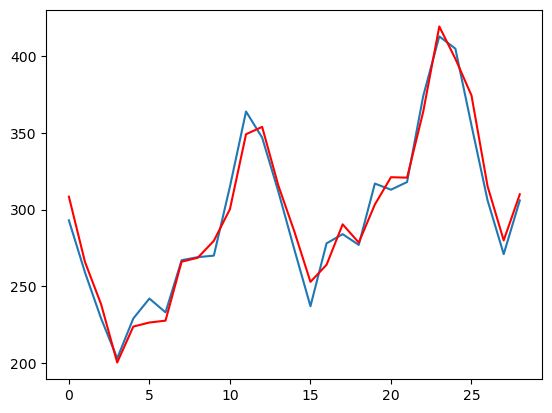

In [193]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [194]:
final_result = pd.concat([table_rmse1,table_rmse2], axis = 0, ignore_index=True)
final_result.loc[len(final_result.index)] = ['ARIMA',rmse_arima ] 
final_result

,MODEL,RMSE_Values
0,rmse_linear,49.685324
1,rmse_Exp,40.849242
2,rmse_Quad,53.189555
3,rmse_add_sea,123.949354
4,rmse_add_sea_quad,34.503504
5,rmse_Mult_sea,127.836935
6,rmse_Mult_add_sea,12.759135
7,simple_exp,76.353743
8,holt,33.954969
9,hwe_add_add,42.181291


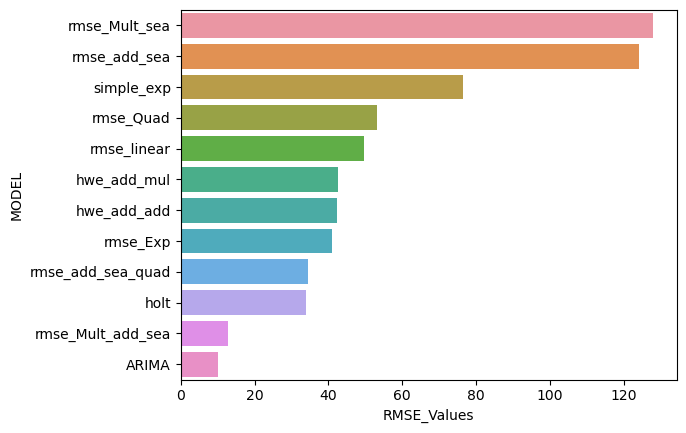

In [195]:
sns.barplot(data=final_result.sort_values(['RMSE_Values'],ascending=False), x="RMSE_Values", y="MODEL")
plt.show()

# Conclusion:
The best model for forcasting is found to be rolling ARIMA with order = (11,3,2), and second best is  model with multiplicative additive Seasonality  with RMSE values 10 and 12 respectively

# forecasting

In [199]:
model_final = ARIMA(X, order=(11,3,2))
model_results = model.fit()
output = model_results.forecast(36)
forecasted = pd.DataFrame(output)
forecasted.columns = ["forecast"]

In [200]:
data_forecast = pd.concat([Data[["passengers"]],forecasted], axis = 0).reset_index(drop=True)

<AxesSubplot:>

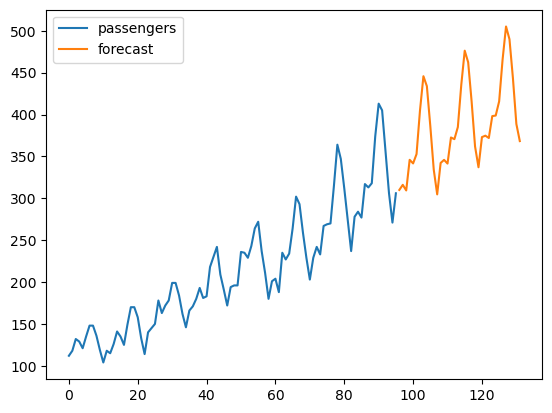

In [201]:
data_forecast.plot()